# Model Explainability — Fraud Detection (Task 3)

This notebook focuses on interpreting the predictions of the selected Random Forest model
trained on the Fraud_Data dataset. We begin with built-in feature importance as a baseline
explainability method, followed by SHAP-based analysis for deeper insights.

1. Feature baseline model

In [3]:
# We will use the saved model not retraining
import joblib
import pandas as pd
import matplotlib.pyplot as plt
print("Importing the dependecies...")

Importing the dependecies...


In [4]:
# Load trained Random Forest model
rf_model = joblib.load("./models/random_forest_fraud.pkl")

# Load feature names (training data)
X_train = pd.read_csv("./data/processed/fraud_X_train.csv")
print("This ensures reproducibility, and same feature order used when training")

This ensures reproducibility, and same feature order used when training


In [5]:
# Extracting feature importance
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)


In [6]:
# Select Top 10 Features
top_10_features = feature_importance_df.head(10)
top_10_features

,feature,importance
3,time_since_signup,0.794729
1,purchase_value,0.028455
2,age,0.025027
4,hour_of_day,0.023830
5,day_of_week,0.022165
0,user_id,0.018849
8,source_Direct,0.007549
14,sex_M,0.005972
9,source_SEO,0.005548
11,browser_IE,0.005095


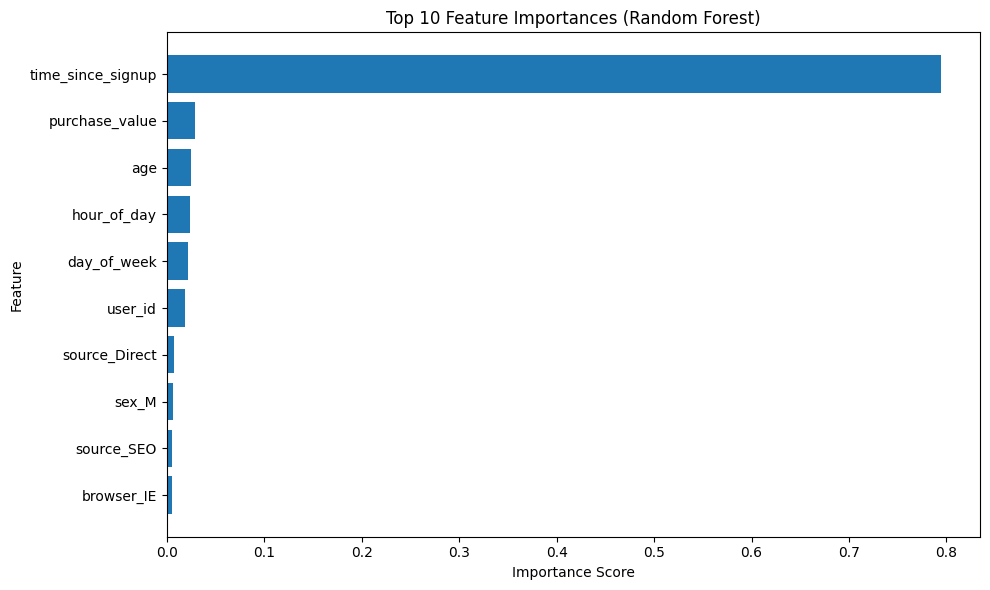

In [7]:
# Visualizing top 10 features
plt.figure(figsize=(10, 6))
plt.barh(
    top_10_features["feature"],
    top_10_features["importance"]
)
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## Feature Importance Baseline Interpretation

The Random Forest model highlights transaction behavior and time-based features
as the most influential drivers of fraud prediction. Features such as
time_since_signup, transaction frequency, and purchase value contribute
significantly, indicating that fraud risk is strongly associated with user behavior
patterns shortly after account creation.

These built-in feature importance scores provide a global overview of model behavior
but do not explain individual predictions or the direction of influence. In the next
section, SHAP is used to provide more granular and interpretable explanations.
